# Hierarchical Clustering

### Introdução
O **Hierarchical Clustering** é uma técnica de aprendizagem não supervisionada utilizada para agrupar dados que têm características semelhantes. O objetivo é identificar grupos (ou clusters) dentro de um conjunto de dados, sendo que esses grupos podem representar padrões ocultos ou relações entre os dados.

Nesta técnica, todos os pontos de dados começam como clusters individuais e vão sendo combinados até formarem uma estrutura hierárquica. Essa hierarquia é frequentemente visualizada através de um **dendrograma**. Uma abordagem comum é a **Agglomerative Clustering**, onde cada ponto começa como um cluster separado e vai sendo aglomerado com os clusters mais próximos até atingir um determinado número de grupos.

### Dados Fictícios
Os dados utilizados neste exemplo são fictícios e representam informações hipotéticas de clientes, incluindo **ID Cliente**, **Rendimento Anual** e **Pontuação de Gastos**. Estes dados são usados para fins educativos e ilustrativos.
c
### Objetivo do Notebook
O objetivo deste notebook é demonstrar como utilizar o **Hierarchical Clustering** para identificar grupos distintos em um conjunto de dados e visualizar a hierarquia de agrupamentos através de um **dendrograma**. A ideia é explorar como diferentes métodos de ligação (linkage) e métricas de distância podem impactar a formação dos clusters, proporcionando uma compreensão prática desta técnica de agrupamento.


### Importação das Bibliotecas Necessárias
Nesta célula, são importadas todas as bibliotecas necessárias para realizar a análise. Utilizamos **Pandas** para manipulação de dados, **Matplotlib** para criar gráficos, e **Scikit-Learn** para o pré-processamento dos dados e aplicação do algoritmo de clusterização.

Se ainda não tiver instalado as bibliotecas abaixo, remova o `#` e execute a célula abaixo para instalar antes de continuar.

In [32]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [3]:
# Importação das bibliotecas necessárias
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para visualização de gráficos
from sklearn.preprocessing import StandardScaler  # Para escalar as características
from scipy.cluster.hierarchy import linkage, dendrogram  # Para a clusterização hierárquica
from sklearn.cluster import AgglomerativeClustering  # Para realizar a clusterização aglomerativa


### Criação dos Dados
Criámos um conjunto de dados fictício com informações sobre os clientes, incluindo **ID Cliente**, **Rendimento Anual (em milhares de dólares)** e **Pontuação de Gastos**. Estes dados são armazenados num DataFrame para facilitar a sua manipulação.

In [6]:
# Criar os dados de entrada
dados = {
    'ID Cliente': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # ID de cada cliente
    'Rendimento Anual (mil $)': [15, 20, 25, 70, 80, 65, 55, 50, 45, 30],  # Rendimento anual em milhares de dólares
    'Pontuação de Gastos (1-100)': [39, 81, 6, 77, 10, 79, 27, 35, 88, 15]  # Pontuação de gastos (de 1 a 100)
}

# Criar um DataFrame com os dados de entrada
dados_marketing = pd.DataFrame(dados)

### Seleção das Características para a Clusterização
Selecionamos as duas variáveis mais relevantes para a clusterização dos clientes: **Rendimento Anual** e **Pontuação de Gastos**. Estas características vão ser utilizadas para agrupar os clientes em clusters, identificando padrões em como os clientes gastam em relação aos seus rendimentos.

In [36]:
# Selecionar as características para a clusterização: rendimento anual e a pontuação de gastos
caracteristicas_para_clusterizacao = dados_marketing[['Rendimento Anual (mil $)', 'Pontuação de Gastos (1-100)']]

### Escalamento dos Dados
Nesta célula, padronizamos os dados utilizando o **StandardScaler**. O escalamento é uma etapa importante para garantir que ambas as características — **Rendimento Anual** e **Pontuação de Gastos** — estejam na mesma escala. Isso é essencial para evitar que uma variável tenha mais peso que a outra durante o processo de clusterização.

In [12]:
# Padronizando os dados para ter média 0 e variância 1 (necessário para melhorar o desempenho da clusterização)
escalador = StandardScaler()
dados_escalados = escalador.fit_transform(caracteristicas_para_clusterizacao)

### Criação do Dendrograma
Aqui criámos um **dendrograma** para visualizar a hierarquia dos clusters. Um dendrograma é um gráfico que mostra a relação entre todos os pontos de dados e nos ajuda a determinar quantos clusters são apropriados. O ponto onde há a maior "queda" vertical sem cruzar outras linhas é uma boa indicação do número ideal de clusters. Neste caso, escolhemos **3 clusters**.

**Gráfico: Dendrograma de Hierarchical Clustering**
- O dendrograma ajuda a identificar o número ótimo de grupos (clusters).
- Observando a maior separação vertical ("queda"), podemos determinar que a melhor escolha é ter **3 clusters**.



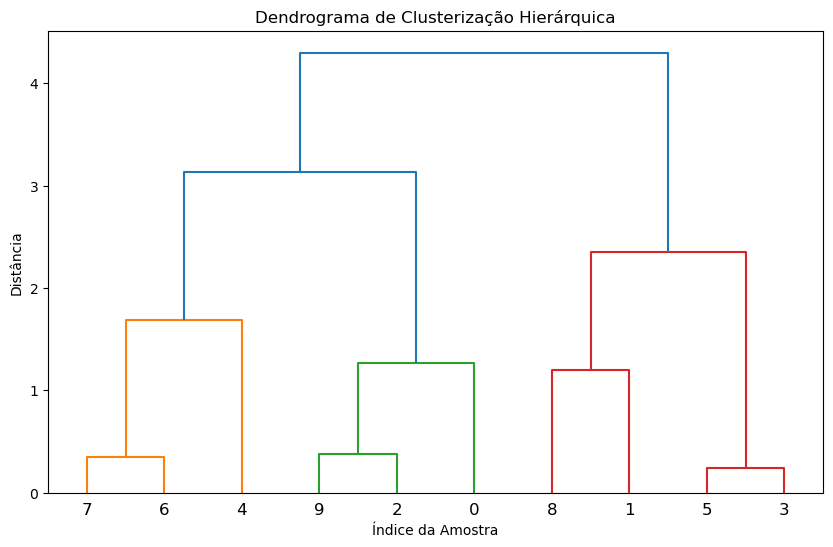

In [15]:
# Criar o dendrograma
ligacao = linkage(dados_escalados, method='ward')

# Plotando o dendrograma para entender a formação dos clusters
plt.figure(figsize=(10, 6))
dendrogram(ligacao, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
plt.show()

### Implicações para o Negócio:
O dendrograma mostra-nos que a base de clientes pode ser segmentada em **3 grupos principais**. Para a empresa, isso significa que existem **três perfis distintos de clientes** com características semelhantes. Esta segmentação pode ser usada para:
- **Desenvolver campanhas de marketing direcionadas**: Cada grupo identificado pode ter uma campanha própria que corresponda às suas necessidades e comportamentos. Por exemplo, um grupo que gasta muito mas tem um rendimento mais baixo pode ser atraído por promoções que ofereçam melhores condições de pagamento.
- **Definir diferentes políticas de preços**: A empresa pode adaptar os preços ou ofertas conforme os grupos de clientes. Grupos de clientes com alto rendimento e alta pontuação de gastos podem estar dispostos a pagar mais por serviços premium.
- **Otimização de recursos**: Identificar grupos homogêneos permite à empresa focar os seus recursos (tempo, orçamento, etc.) de maneira mais eficiente. Se certos grupos são mais lucrativos, mais investimento pode ser feito em campanhas direcionadas para esses clientes.


In [20]:
# Definir o número de clusters com base no dendrograma
numero_de_clusters = 3
clusterizacao_aglomerativa = AgglomerativeClustering(n_clusters=numero_de_clusters, linkage='ward')

# Aplicar a clusterização aglomerativa aos dados escalados
dados_marketing['Cluster'] = clusterizacao_aglomerativa.fit_predict(dados_escalados)

# Exibir o resultado dos clusters
print(dados_marketing[['ID Cliente', 'Rendimento Anual (mil $)', 'Pontuação de Gastos (1-100)', 'Cluster']])

   ID Cliente  Rendimento Anual (mil $)  Pontuação de Gastos (1-100)  Cluster
0           1                        15                           39        2
1           2                        20                           81        0
2           3                        25                            6        2
3           4                        70                           77        0
4           5                        80                           10        1
5           6                        65                           79        0
6           7                        55                           27        1
7           8                        50                           35        1
8           9                        45                           88        0
9          10                        30                           15        2


### Gráfico dos Clusters Resultantes
Criámos um gráfico de dispersão para visualizar os clusters formados. Cada ponto representa um cliente, e a cor indica a qual cluster ele pertence. Este tipo de gráfico é útil para entender melhor a segmentação dos clientes, mostrando claramente como os grupos se diferenciam em termos de **Rendimento Anual** e **Pontuação de Gastos**.


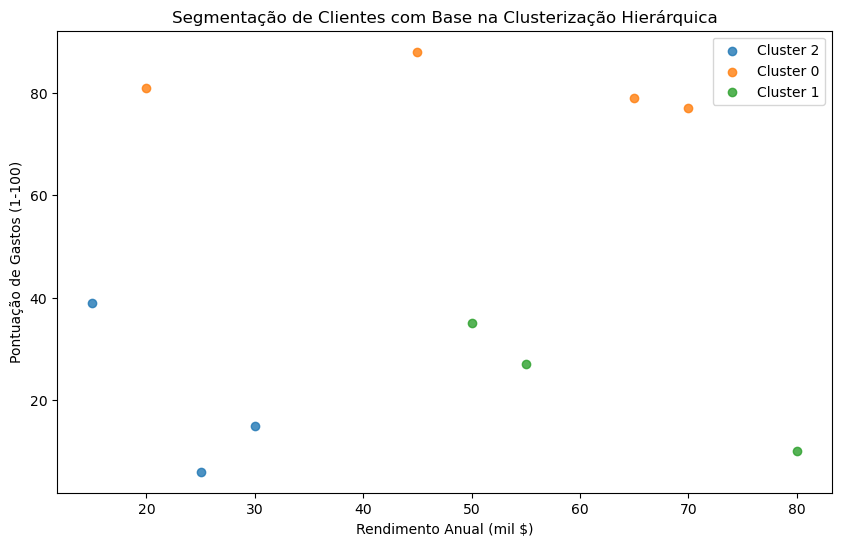

In [28]:
# Representacao Grafica os clusters resultantes
plt.figure(figsize=(10, 6))

# Para cada cluster, vamos criar um gráfico de dispersão
for id_cluster in dados_marketing['Cluster'].unique():
    dados_cluster = dados_marketing[dados_marketing['Cluster'] == id_cluster]
    plt.scatter(dados_cluster['Rendimento Anual (mil $)'], dados_cluster['Pontuação de Gastos (1-100)'],
                label=f'Cluster {id_cluster}', alpha=0.8)

plt.title('Segmentação de Clientes com Base na Clusterização Hierárquica')
plt.xlabel('Rendimento Anual (mil $)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend()
plt.show()


### Implicações para o Negócio:
O gráfico de dispersão mostra **três clusters** distintos de clientes, cada um representando um grupo com padrões de rendimento e gastos específicos.

- **Cluster 1: Rendimento Alto, Gastos Altos**  
  Este grupo representa clientes que não apenas têm um rendimento elevado, mas também estão dispostos a gastar bastante. Para a empresa, este cluster é extremamente valioso:
  - **Produtos Premium**: Pode-se oferecer produtos ou serviços exclusivos, de alto valor.
  - **Programa de Fidelidade**: Estes clientes são ideais para um programa de fidelidade que ofereça recompensas valiosas.

- **Cluster 2: Rendimento Médio, Gastos Moderados**  
  Este grupo está no meio da escala, com rendimentos e gastos em níveis médios. São clientes que podem ser mais sensíveis a promoções:
  - **Campanhas Promocionais**: Podem ser atraídos por descontos sazonais ou vantagens ao comprar em maior quantidade.
  - **Upsell**: Oferecer produtos ligeiramente superiores pode ser uma boa estratégia para aumentar a receita vinda deste grupo.

- **Cluster 3: Rendimento Baixo, Gastos Baixos**  
  Estes são clientes que têm um rendimento e gastos mais baixos. Apesar de terem menor potencial de receita direta, ainda assim podem ser importantes:
  - **Ofertas Acessíveis**: É importante oferecer opções de baixo custo para garantir que este grupo permaneça engajado com a marca.
  - **Construção de Relacionamento**: Embora não gastem muito agora, criar um relacionamento pode fazer com que, no futuro, esses clientes aumentem os gastos à medida que o seu poder de compra cresça.

### Conclusão
O **Hierarchical Clustering** é uma técnica poderosa para segmentar dados e encontrar padrões ocultos. Utilizando o dendrograma e o algoritmo de **Agglomerative Clustering**, conseguimos dividir os clientes em grupos que apresentam características semelhantes, como rendimentos e comportamentos de gastos. Esta abordagem pode ser muito útil para definir estratégias personalizadas de negócios e marketing.


### Nota
Todos os dados utilizados neste notebook são puramente para **fins de demonstração**.

### Este notebook foi escrito por Simão Rafique

Pode seguir-me no [LinkedIn](https://www.linkedin.com/in/simão-rafique).